# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет.

**Содержание**<a id='toc0_'></a>    
- 1. [Подготовка данных](#toc1_)    
  - 1.1. [Импорт и изучение данных](#toc1_1_)    
  - 1.2. [Обработка некорректных значений](#toc1_2_)    
  - 1.3. [Разбиение данных на группы](#toc1_3_)    
  - 1.4. [Масштабирование данных](#toc1_4_)    
- 2. [Исследование задачи](#toc2_)    
- 3. [Борьба с дисбалансом](#toc3_)    
  - 3.1. [Взвешивание классов](#toc3_1_)    
  - 3.2. [Upsampling](#toc3_2_)    
  - 3.3. [Downsampling](#toc3_3_)    
- 4. [Тестирование модели](#toc4_)    
- 5. [Общий вывод:](#toc5_)    
- 6. [Чек-лист готовности проекта](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Подготовка данных](#toc0_)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score

### 1.1. <a id='toc1_1_'></a>[Импорт и изучение данных](#toc0_)

Импортируем файл с данными и изучим его.

In [2]:
data_raw = pd.read_csv('Churn.csv', index_col='RowNumber')

In [3]:
data_raw.head(20)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0


In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           9091 non-null   float64
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.1+ MB


### 1.2. <a id='toc1_2_'></a>[Обработка некорректных значений](#toc0_)

Приведём названия столбцов к нижнему регистру

In [5]:
data = data_raw.copy()
data.columns = data.columns.str.lower()

In [6]:
data.rename(columns={'customerid': 'customer_id', 'credit_score': 'credit_score',
                     'numofproducts': 'num_of_products', 'hascrcard': 'has_cr_card',
                     'isactivemember':'is_active_member', 'estimatedsalary': 'estimated_salary'}, inplace=True)

Будем считать, что пропуски в столбце `tenure` (сколько лет человек является клиентом банка) означают, что он является клиентом банка меньше года. Учитывая это. заполним пропуски нулями.

In [7]:
data.tenure.fillna(0, inplace=True)

В столбцах с данными строкового типа проведём прямое кодирование признаков.

In [8]:
data = pd.get_dummies(data, columns=['geography', 'gender'], drop_first=True)

<div class="alert alert-block alert-success">
<b>Успех:</b>  OHE - хороший выбор. Но лучше использовать инструмент OneHotEncoder от sklearn и кодировать данные после разбиения
</div>


### 1.3. <a id='toc1_3_'></a>[Разбиение данных на группы](#toc0_)

Отделим целевой признак от остальных. Идентификатор и фамилию не будем рассматривать как признаки.

In [9]:
features = data.drop(columns=['customer_id', 'surname', 'exited'])
target = data['exited']

In [10]:
train_valid_features, test_features, train_valid_target, test_target = train_test_split(
    features, target, test_size=0.2, random_state=23221)

train_features, valid_features, train_target, valid_target = train_test_split(
    train_valid_features, train_valid_target, test_size=0.25, random_state=84272)

### 1.4. <a id='toc1_4_'></a>[Масштабирование данных](#toc0_)

Создадим объект класса `StandardScaler`, с его помощью масштабируем данные.

In [11]:
scaler = StandardScaler().fit(X=train_features)

In [12]:
train_features = pd.DataFrame(scaler.transform(train_features), columns=features.columns)
valid_features = pd.DataFrame(scaler.transform(valid_features), columns=features.columns)
train_target.reset_index(drop=True, inplace=True)
valid_target.reset_index(drop=True, inplace=True)

In [13]:
for df in [train_features, valid_features, test_features, train_target, valid_target, test_target]:
    print(df.shape)

(6000, 11)
(2000, 11)
(2000, 11)
(6000,)
(2000,)
(2000,)


**Вывод по разделу 1:**  
- Исследуемый датасет содержит 12 столбцов и 10_000 строк.
- В одном столбце датасета заполнены пропуски.
- Столбцы со строковым типом данных заменены с помощью прямого кодирования.
- Данные разбиты на 3 выборки: обучающую, валидационную и тестовую.
- Данные отмасштабированы методами, встроенными в библиотеку sklearn.

## 2. <a id='toc2_'></a>[Исследование задачи](#toc0_)

Сравним количество элементов в каждом классе обучающей выборки.

In [14]:
train_target.value_counts()

0    4804
1    1196
Name: exited, dtype: int64

Данные не сбалансированы: объектов класса "0" в 4 раза больше, чем класса "1".

Попробуем найти лучшую модель, не учитывая дисбаланс классов.

In [15]:
model = LogisticRegression(solver='liblinear', random_state=98241)

model.fit(train_features, train_target)

valid_predictions = model.predict(valid_features)

print('F1-мера:', f1_score(valid_target, valid_predictions))
print('AUC-ROC:', roc_auc_score(valid_target, model.predict_proba(valid_features)[:, 1]))

F1-мера: 0.3274021352313167
AUC-ROC: 0.7659404651494612


Чтобы в дальнейшем не повторять фрагменты кода, напишем функции подбора лучших гиперпараметров моделей дерева решений и случайного леса.

In [16]:
def find_best_decision_tree(features_train, target_train,
                            features_valid, target_valid, arange=(2, 20), **kwargs):
    f1_max, best_depth = 0, 2
    for depth in range(*arange):
        model = DecisionTreeClassifier(max_depth=depth, random_state=54412, **kwargs)
        model.fit(features_train, target_train)
        
        predictions_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions_valid)
        
        if f1 > f1_max:
            best_tree_model = model
            f1_max = f1
            best_depth = depth
    
    print('Значение depth лучшей модели:', best_depth)
    print('F1-мера лучшей модели:', f1_max)
    print('AUC-ROC лучшей модели:', roc_auc_score(target_valid, best_tree_model.predict_proba(features_valid)[:, 1]))
    return best_tree_model

In [17]:
best_decision_tree = find_best_decision_tree(train_features, train_target, valid_features, valid_target)

Значение depth лучшей модели: 9
F1-мера лучшей модели: 0.568062827225131
AUC-ROC лучшей модели: 0.7917067965090009


Модель решающего дерева оказалась значительно лучше логистической регрессии. Теперь рассмотрим модель случайного леса.

In [18]:
def find_best_random_forest(features_train, target_train, features_valid, target_valid,
                            n_estimators_arange=(20, 111, 10), **kwargs):
    f1_max, best_n_est = 0, 0
    for n_est in range(*n_estimators_arange):
        model = RandomForestClassifier(n_estimators=n_est, random_state=54412, **kwargs)
        model.fit(features_train, target_train)
        
        predictions_valid = model.predict(features_valid)
        
        f1 = f1_score(target_valid, predictions_valid)
        
        if f1 > f1_max:
            best_forest_model = model
            f1_max = f1
            best_n_est = n_est
        
    print('Значение n_est лучшей модели:', best_n_est)
    print('F1-мера лучшей модели:', f1_max)
    print('AUC-ROC лучшей модели:', roc_auc_score(target_valid, best_forest_model.predict_proba(features_valid)[:, 1]))
    return best_forest_model

In [19]:
best_random_forest = find_best_random_forest(train_features, train_target,
                                             valid_features, valid_target, max_depth=9)

Значение n_est лучшей модели: 60
F1-мера лучшей модели: 0.5828220858895705
AUC-ROC лучшей модели: 0.8605146132077716


Случайный лес, в котором 60 деревьев оказался лучше дерева решений, усли судить по 1-мере. При этом значение AUC-ROC незначительно уменьшилось.

**Вывод по разделу 2:**  
- Данные не сбалансированы: объектов класса "0" в 4 раза больше, чем класса "1".
- Подобраны оптимальные гиперпараметры для моделей логистической регрессии, дерева решений, а также случайного леса **без учёта дисбаланса классов**.
- Лучшая модель - случайный лес (**максимальная глубина: 9, количество деревьев: 60**).
- Метрики лучшей модели - **F1-мера: 0.58, AUC-ROC: 0.86**.

## 3. <a id='toc3_'></a>[Борьба с дисбалансом](#toc0_)

Теперь постараемся увеличить значения используемых метрик, учитывая дисбаланс классов.  
Для начала, в рассмотренных моделях используем взвешивание классов.

### 3.1. <a id='toc3_1_'></a>[Взвешивание классов](#toc0_)

In [20]:
model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=98241)

model.fit(train_features, train_target)

valid_predictions = model.predict(valid_features)

print('F1-мера:', f1_score(valid_target, valid_predictions))
print('AUC-ROC:', roc_auc_score(valid_target, model.predict_proba(valid_features)[:, 1]))

F1-мера: 0.4995808885163453
AUC-ROC: 0.769792930013555


In [21]:
best_tree_balanced = find_best_decision_tree(train_features, train_target, valid_features, valid_target,
                                             class_weight='balanced')

Значение depth лучшей модели: 6
F1-мера лучшей модели: 0.57243195785777
AUC-ROC лучшей модели: 0.8239020772395423


In [22]:
best_forest_balanced = find_best_random_forest(train_features, train_target, valid_features, valid_target,
                                              max_depth=6, class_weight='balanced')

Значение n_est лучшей модели: 30
F1-мера лучшей модели: 0.6182902584493043
AUC-ROC лучшей модели: 0.8516243668402653


При взвешивании классов логистическая регрессия показала себя значительно лучше, а метрики моделей дерева решений и случайного леса стали выше но ненамного.

### 3.2. <a id='toc3_2_'></a>[Upsampling](#toc0_)

Теперь для уравновешивания классов используем технику upsampling.

In [23]:
def upsample(features, target, repeat): 
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=35435)
    
    return features_upsampled, target_upsampled

In [24]:
train_features_ups, train_target_ups = upsample(train_features, train_target, repeat=4)

In [25]:
model = LogisticRegression(solver='liblinear', random_state=98241)

model.fit(train_features_ups, train_target_ups)

valid_predictions = model.predict(valid_features)

print('F1-мера:', f1_score(valid_target, valid_predictions))
print('AUC-ROC:', roc_auc_score(valid_target, model.predict_proba(valid_features)[:, 1]))

F1-мера: 0.5
AUC-ROC: 0.7697944163040119


In [26]:
best_tree_ups = find_best_decision_tree(train_features_ups, train_target_ups, valid_features, valid_target)

Значение depth лучшей модели: 6
F1-мера лучшей модели: 0.57243195785777
AUC-ROC лучшей модели: 0.8238433687664978


In [27]:
best_forest_ups = find_best_random_forest(train_features_ups, train_target_ups, valid_features, valid_target,
                                              max_depth=6)

Значение n_est лучшей модели: 110
F1-мера лучшей модели: 0.6046065259117083
AUC-ROC лучшей модели: 0.8563827257377947


Применение техники upsampling почти не изменило метрики в сравнении со взвешиванием классов.

### 3.3. <a id='toc3_3_'></a>[Downsampling](#toc0_)

Теперь для уравновешивания классов используем технику downsampling.

In [28]:
def downsample(features, target, fraction): 
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [29]:
train_features_downs, train_target_downs = downsample(train_features, train_target, fraction=0.25)

In [30]:
model = LogisticRegression(solver='liblinear', random_state=98241)

model.fit(train_features_downs, train_target_downs)

valid_predictions = model.predict(valid_features)

print('F1-мера:', f1_score(valid_target, valid_predictions))
print('AUC-ROC:', roc_auc_score(valid_target, model.predict_proba(valid_features)[:, 1]))

F1-мера: 0.48172757475083067
AUC-ROC: 0.7669585741123874


In [31]:
best_tree_downs = find_best_decision_tree(train_features_downs, train_target_downs, valid_features, valid_target)

Значение depth лучшей модели: 6
F1-мера лучшей модели: 0.5754985754985755
AUC-ROC лучшей модели: 0.820578731778079


In [32]:
best_forest_downs = find_best_random_forest(train_features_downs, train_target_downs, valid_features, valid_target,
                                              max_depth=6)

Значение n_est лучшей модели: 80
F1-мера лучшей модели: 0.6049149338374291
AUC-ROC лучшей модели: 0.857747140377161


Техника downsampling также не увеличила рассматриваемые метрики.

**Вывод по разделу 3:**
- Для борьбы с дисбалансом применены следующие техники: взвешивание классов, upsampling, downsampling.
- Лучше всего себя показало взвешивание классов **F1-мера: 0.61, AUC-ROC: 0.85**.
- Лучшая модель - так же случайный лес (**максимальная глубина: 6, количество деревьев: 30**).

## 4. <a id='toc4_'></a>[Тестирование модели](#toc0_)

Зная гиперпараметры нужной модели, обучим ёё на обучающей и валидационной выборках, и проверим качество на тестовой.

In [33]:
train_valid_features = pd.DataFrame(scaler.transform(train_valid_features), columns=features.columns)
train_valid_target.reset_index(drop=True, inplace=True)

test_features = pd.DataFrame(scaler.transform(test_features), columns=features.columns)
test_target.reset_index(drop=True, inplace=True)

In [34]:
best_model = RandomForestClassifier(max_depth=6, n_estimators=30, class_weight='balanced', random_state=36322)
best_model.fit(train_valid_features, train_valid_target)

test_predictions = best_model.predict(test_features)

print('F1-мера:', f1_score(test_target, test_predictions))
print('AUC-ROC:', roc_auc_score(test_target, model.predict_proba(test_features)[:, 1]))

F1-мера: 0.5948717948717949
AUC-ROC: 0.7701176782910787


**Вывод по разделу 4:**  
Выбранная модель позволяет получить следующие значения метрик:  
**F1-мера: 0.59, AUC-ROC: 0.77.**

Для понимания, какие в итоге факторы важны при моделировании, изучим их важность, используя feature_importances_.

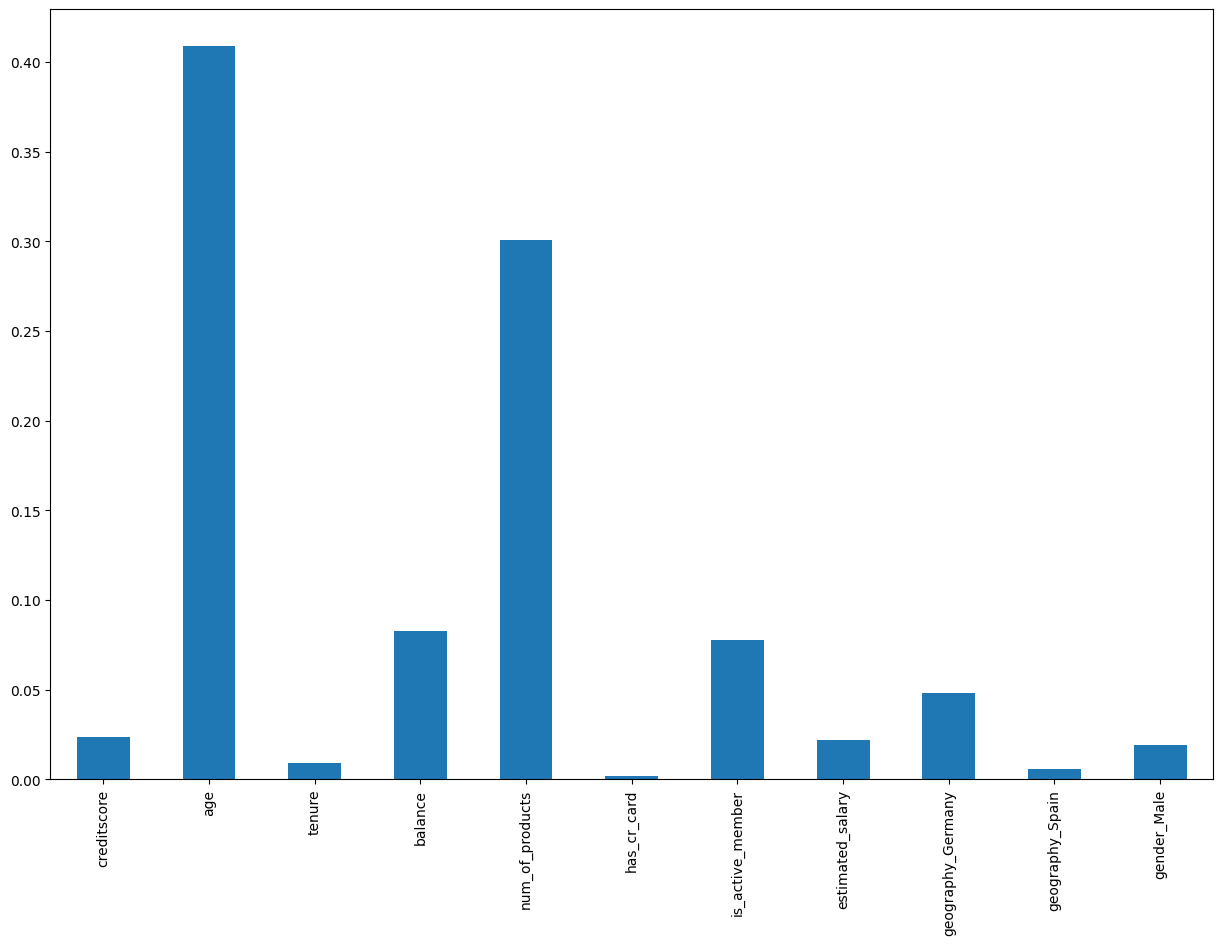

In [35]:
pd.Series(best_model.feature_importances_, index=features.columns).plot.bar(figsize=(15, 10));

По сути на решение клиента уйти или остаться влияют всего 2 фактора: возраст и количество продуктов банка, используемых клиентом; при этом некоторые показатели практически не важны: наличие кредитной карты, страна проживания.
 
Рассмотрим график распределения среднего числа ушедших клиентов по возрастным группам.

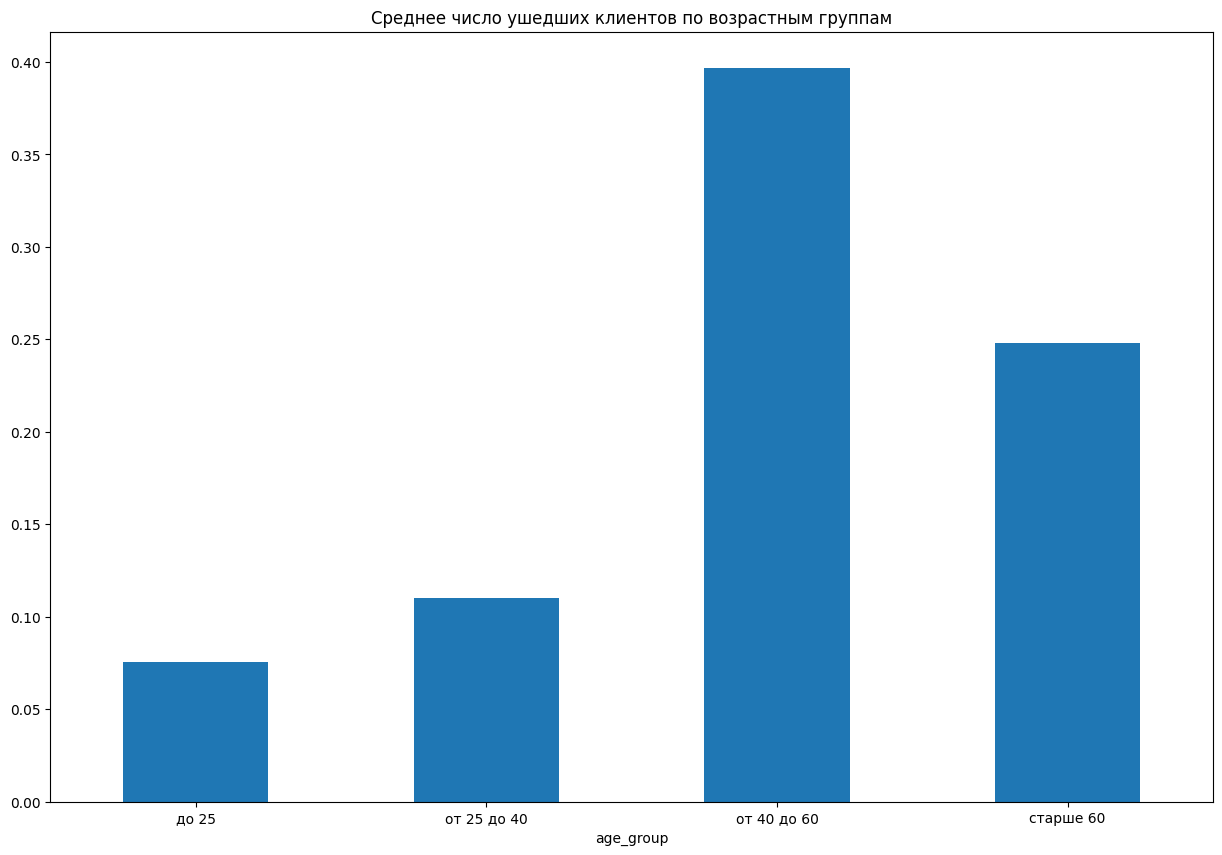

In [36]:
age_exited = data[['age', 'exited']].copy()
age_exited['age_group'] = pd.cut(age_exited.age, [0, 25, 40, 60, 100],
                                 labels=['до 25', 'от 25 до 40', 'от 40 до 60', 'старше 60'])
age_exited\
    .pivot_table(index='age_group', values='exited')\
    .plot.bar(figsize=(15, 10), title='Среднее число ушедших клиентов по возрастным группам', legend=False)
plt.xticks(rotation=0);

Наибольшее число ушедших клиентов - старше 40.

## 5. <a id='toc5_'></a>[Общий вывод:](#toc0_)

- В работе была проведена подготовка данных, включая разбиение на выборки и масштабирование
- Для борьбы с дисбалансом классов были применены следующие техники  взвешивание классов, upsampling, downsampling.
- Лучшая модель - случайный лес (максимальная глубина: 6, количество деревьев: 30).
- На тестовой выборке получены следующие значения метрик: **F1-мера: 0.59, AUC-ROC: 0.765.**
- На решение клиента уйти или остаться сильнее всего влияют 2 фактора: **возраст** и **количество продуктов банка, используемых клиентом.**

## 6. <a id='toc6_'></a>[Чек-лист готовности проекта](#toc0_)

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные подготовлены
- [x]  Задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*